In [52]:
# -*- coding:utf-8 -*-
import webbrowser
import requests
from bs4 import BeautifulSoup as bs
import re
import pandas as pd

# gen url to jisho
def webInfo(kan):
    webstem = 'https://jisho.org/search/'
    suffix = ""
    k = str((kan).encode("utf-8"))
    kanji = k[2:-1]
    chars = "\\x"
    kanji = kanji.replace(chars, '%')
    webstring = webstem + kanji + suffix
    return webstring


# Load webpage content
def jlptGrade(webstring):
    r = requests.get(webstring)
    soup = bs(r.content, features="html.parser")
    try:
        n = soup.find("span", string=re.compile('(JLPT|jlpt)')).text
        grade = n.split(' ')[1]
    except:
        grade = 'NX'
    return grade

In [53]:
# get csv to df for preparation
path = '/Users/mattcollins/Projects/MyProject/KanjiProgram/csvs/word_dictionary.csv'
df = pd.read_csv(path)
kanjis = df['kanji']

In [54]:
# scrape grades
# get prev scraped grades
prevs= pd.read_csv('kanji_data_cleansed.csv')
grades = list(prevs.grade)
maxer = prevs['word index'].max()

for i,kanji in enumerate(kanjis):
    if i > maxer:
        if i % 10 ==0 or i == maxer + 1:
            print(i, kanji)
        webstring = webInfo(kanji)
        grade = jlptGrade(webstring)
        grades.append(grade)

print('Scraped!')


# print(grades)

Scraped!


In [55]:
df['grade'] = grades
print(df.grade.value_counts())


N5    246
N4    152
N3    102
NX     99
N2     36
N1     26
Name: grade, dtype: int64


In [56]:
# get streak info
path = '/Users/mattcollins/Projects/MyProject/KanjiProgram/csvs/streak.csv'
df_str = pd.read_csv(path)
df['streak'] = df_str.streak
df['level'] = df.streak.apply(lambda x: 'expert' if x > 7 else 'advanced' if x > 2 else 'beginner')

In [57]:
# get results info
path = '/Users/mattcollins/Projects/MyProject/KanjiProgram/csvs/results2.csv'
df_res = pd.read_csv(path)
fails = df_res.groupby('index_word')['result'].value_counts().unstack().fillna(0)[0]
successes = df_res.groupby('index_word')['result'].value_counts().unstack().fillna(0)[1]
df['total_attempts'] = (fails + successes)
df['total_successes'] = successes
df['total_fails'] = fails
df['success_ratio'] = df['total_successes']/df['total_attempts']
df

,word index,english,hiragana,kanji,date_added,rank,sample,is_active,grade,streak,level,total_attempts,total_successes,total_fails,success_ratio
0,0,house,いえ,家,09/05/2020,1,1,0,N5,10,expert,19.0,19.0,0.0,1.000000
1,1,(someone's) house,おたく,お宅,09/05/2020,1,1,0,N4,10,expert,12.0,12.0,0.0,1.000000
2,2,nervous,ふあん,不安,09/05/2020,2,1,0,N3,10,expert,17.0,17.0,0.0,1.000000
3,3,class,じゅぎょう,授業,09/05/2020,3,1,0,N5,10,expert,55.0,45.0,10.0,0.818182
4,4,to lend,かす,貸す,09/05/2020,2,1,0,N5,10,expert,42.0,35.0,7.0,0.833333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
656,656,monkey,さる,猿,03/04/2021,3,4,1,N3,4,advanced,19.0,15.0,4.0,0.789474
657,657,freedom,じゆう,自由,05/04/2021,1,5,1,N4,4,advanced,25.0,18.0,7.0,0.720000
658,658,document,しょるい,書類,05/04/2021,4,4,1,N3,4,advanced,10.0,7.0,3.0,0.700000
659,659,science,かがく,科学,17/04/2021,3,5,1,N4,2,beginner,8.0,8.0,0.0,1.000000


In [58]:
# age column
from datetime import datetime as dt

today_ = pd.to_datetime('today').normalize()

df['age'] = df.date_added.apply(lambda x: today_ - pd.to_datetime(dt.strptime(x,"%d/%m/%Y"))).dt.days
df

,word index,english,hiragana,kanji,date_added,rank,sample,is_active,grade,streak,level,total_attempts,total_successes,total_fails,success_ratio,age
0,0,house,いえ,家,09/05/2020,1,1,0,N5,10,expert,19.0,19.0,0.0,1.000000,346
1,1,(someone's) house,おたく,お宅,09/05/2020,1,1,0,N4,10,expert,12.0,12.0,0.0,1.000000,346
2,2,nervous,ふあん,不安,09/05/2020,2,1,0,N3,10,expert,17.0,17.0,0.0,1.000000,346
3,3,class,じゅぎょう,授業,09/05/2020,3,1,0,N5,10,expert,55.0,45.0,10.0,0.818182,346
4,4,to lend,かす,貸す,09/05/2020,2,1,0,N5,10,expert,42.0,35.0,7.0,0.833333,346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
656,656,monkey,さる,猿,03/04/2021,3,4,1,N3,4,advanced,19.0,15.0,4.0,0.789474,17
657,657,freedom,じゆう,自由,05/04/2021,1,5,1,N4,4,advanced,25.0,18.0,7.0,0.720000,15
658,658,document,しょるい,書類,05/04/2021,4,4,1,N3,4,advanced,10.0,7.0,3.0,0.700000,15
659,659,science,かがく,科学,17/04/2021,3,5,1,N4,2,beginner,8.0,8.0,0.0,1.000000,3


In [59]:
import numpy as np
df['reset'] = np.where((df.streak < 8) & (df.age > 200), 1, 0)

In [60]:
df.to_csv('kanji_data_cleansed.csv', index=False)

In [16]:
path = '/Users/mattcollins/Projects/MyProject/KanjiProgram/csvs/fact_streak.csv'
df2 = pd.read_csv(path)
df2

,index_word,streak,date,sample
0,1,8,04/08/2020,1
1,5,8,04/08/2020,1
2,16,8,04/08/2020,1
3,20,7,04/08/2020,1
4,39,8,04/08/2020,1
...,...,...,...,...
6707,588,6,12/04/2021,4
6708,590,6,12/04/2021,5
6709,640,6,12/04/2021,5
6710,654,1,12/04/2021,4


In [27]:
df[(df.reset == 1) & (df.streak < 6)]


,word index,english,hiragana,kanji,date_added,rank,sample,is_active,grade,streak,level,total_attempts,total_successes,total_fails,success_ratio,age,reset
31,31,married couple,ふうふ,夫婦,09/05/2020,5,1,1,N3,5,advanced,73.0,50.0,23.0,0.684932,339,1
295,295,to fail,しっぱいする,失敗する,27/06/2020,3,1,1,N4,5,advanced,70.0,40.0,30.0,0.571429,290,1
302,302,absolutely,ぜったい,絶対,28/06/2020,3,1,1,N3,5,advanced,55.0,30.0,25.0,0.545455,289,1
311,311,in fact,じっさい,実際,01/07/2020,4,1,1,N3,5,advanced,41.0,25.0,16.0,0.609756,286,1
330,330,to stay at,とまる,泊まる,13/07/2020,2,1,1,N4,5,advanced,31.0,23.0,8.0,0.741935,274,1
345,345,the future,しょうらい,将来,17/07/2020,5,1,1,N4,5,advanced,67.0,44.0,23.0,0.656716,270,1
348,348,dream,ゆめ,夢,18/07/2020,3,1,1,N4,5,advanced,23.0,17.0,6.0,0.739130,269,1
369,369,politics,せいじ,政治,22/07/2020,3,1,1,N4,4,advanced,55.0,33.0,22.0,0.600000,265,1
375,375,grade (on a test),せいせき,成績,25/07/2020,5,1,1,N3,5,advanced,72.0,44.0,28.0,0.611111,262,1
435,435,belongings,しょじひん,所持品,11/08/2020,4,1,1,NX,5,advanced,32.0,20.0,12.0,0.625000,245,1


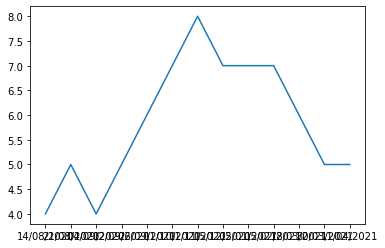